In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

In [147]:
np.random.seed(42)

practice1

In [148]:
#設定參數
#自己設定
true_a = 2.0
true_b = 1.0
#題目要求
sigma0 = 3.0
x = np.linspace(1, 10, 10)
num_sets = 2000

In [149]:
#擬合函數
def linear_func(x, a, b):
    return a * x + b

In [150]:
#儲存變數
a_list = []
b_list = []
fit_results = []
all_data = []
chi2_values = []

In [151]:
#產生資料&擬合
for i in range(num_sets):
    noise = np.random.normal(0, sigma0, size=len(x))
    y = true_a * x + true_b + noise
    all_data.append(y)

    popt, _ = curve_fit(linear_func, x, y)
    fit_y = linear_func(x, *popt)
    fit_results.append(popt)
    #為practice 3做準備
    a_list.append(popt[0])
    b_list.append(popt[1])
    #計算
    residuals = y - fit_y
    chi2_i = np.sum((residuals / sigma0)**2)
    chi2_values.append(chi2_i)

    # 印出全部結果
    # print(f"第 {i+1} 組:a = {popt[0]:.4f}, b = {popt[1]:.4f}, χ² = {chi2_i:.4f}")


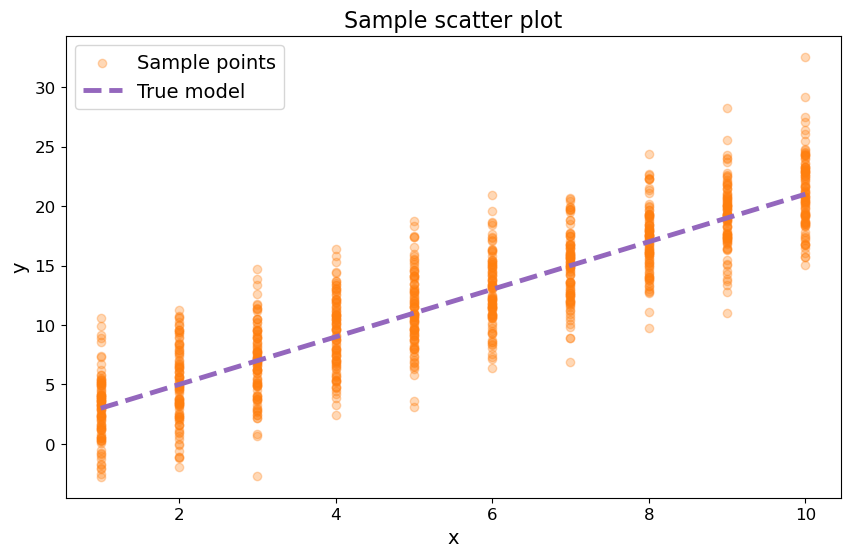

In [152]:
# 畫出資料點
plt.figure(figsize=(10, 6))
for i in range(100): 
    # plt.plot(x, all_data[i], 'o', alpha=0.3)
    plt.scatter(x, all_data[i], color='C1', alpha=0.3)
plt.scatter([], [], color='C1', alpha=0.3, label='Sample points')
plt.plot(x, true_a * x + true_b, color='C4', label='True model', linewidth=3.5, linestyle='--') 
plt.title('Sample scatter plot', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('y', fontsize=14)
plt.yticks(fontsize=12)
plt.legend(fontsize=14, loc='upper left')
plt.savefig("output1_1.pdf", transparent=True)
plt.show()

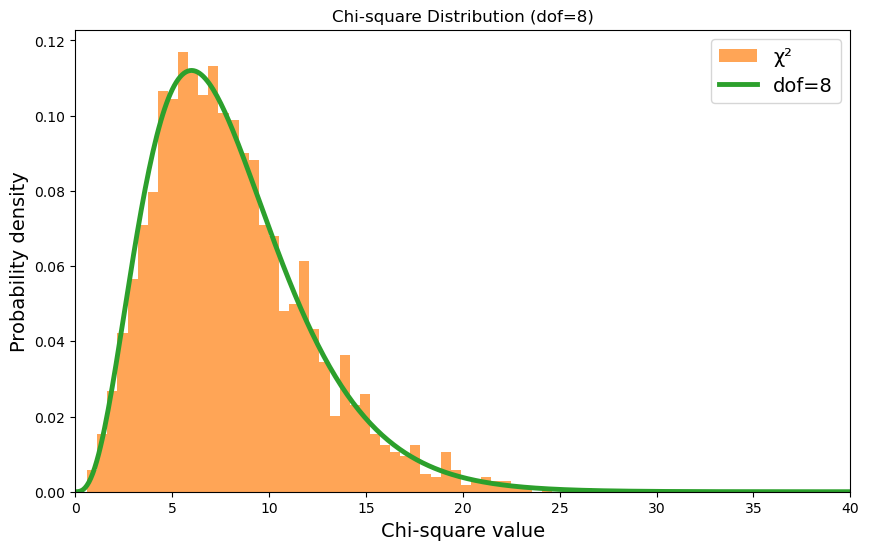

In [153]:
#chi square直方圖
plt.figure(figsize=(10, 6))
plt.hist(chi2_values, bins=50, density=True, alpha=0.7, label='χ²', color='C1')
x_chi = np.linspace(0, 50, 500)
plt.plot(x_chi, chi2.pdf(x_chi, df=8), linestyle='-', color='C2', label='dof=8', linewidth=3.5)
plt.title('Chi-square Distribution (dof=8)')
plt.xlabel('Chi-square value', fontsize=14)
plt.ylabel('Probability density', fontsize=14)
plt.xlim(left=0, right=40)
plt.legend(fontsize=14)
plt.savefig("output1_2.pdf", transparent=True)
plt.show()

In [154]:
plt.close('all')

practice 2

In [155]:
#假設chi2_values和fit_results是前面已算好的list
chi2_values = np.array(chi2_values)
fit_results = np.array(fit_results)

#根據chi square值排序，取得排序後的索引
sorted_indices = np.argsort(chi2_values)

#將排序後的擬合參數依區段分成五區（每區400組）
num_per_group = 400
a_groups = []
b_groups = []

for i in range(5):
    #取出這一區的index
    idx = sorted_indices[i * num_per_group : (i + 1) * num_per_group]
    a_groups.append(fit_results[idx, 0])  #取出a值
    b_groups.append(fit_results[idx, 1])  #取出b值

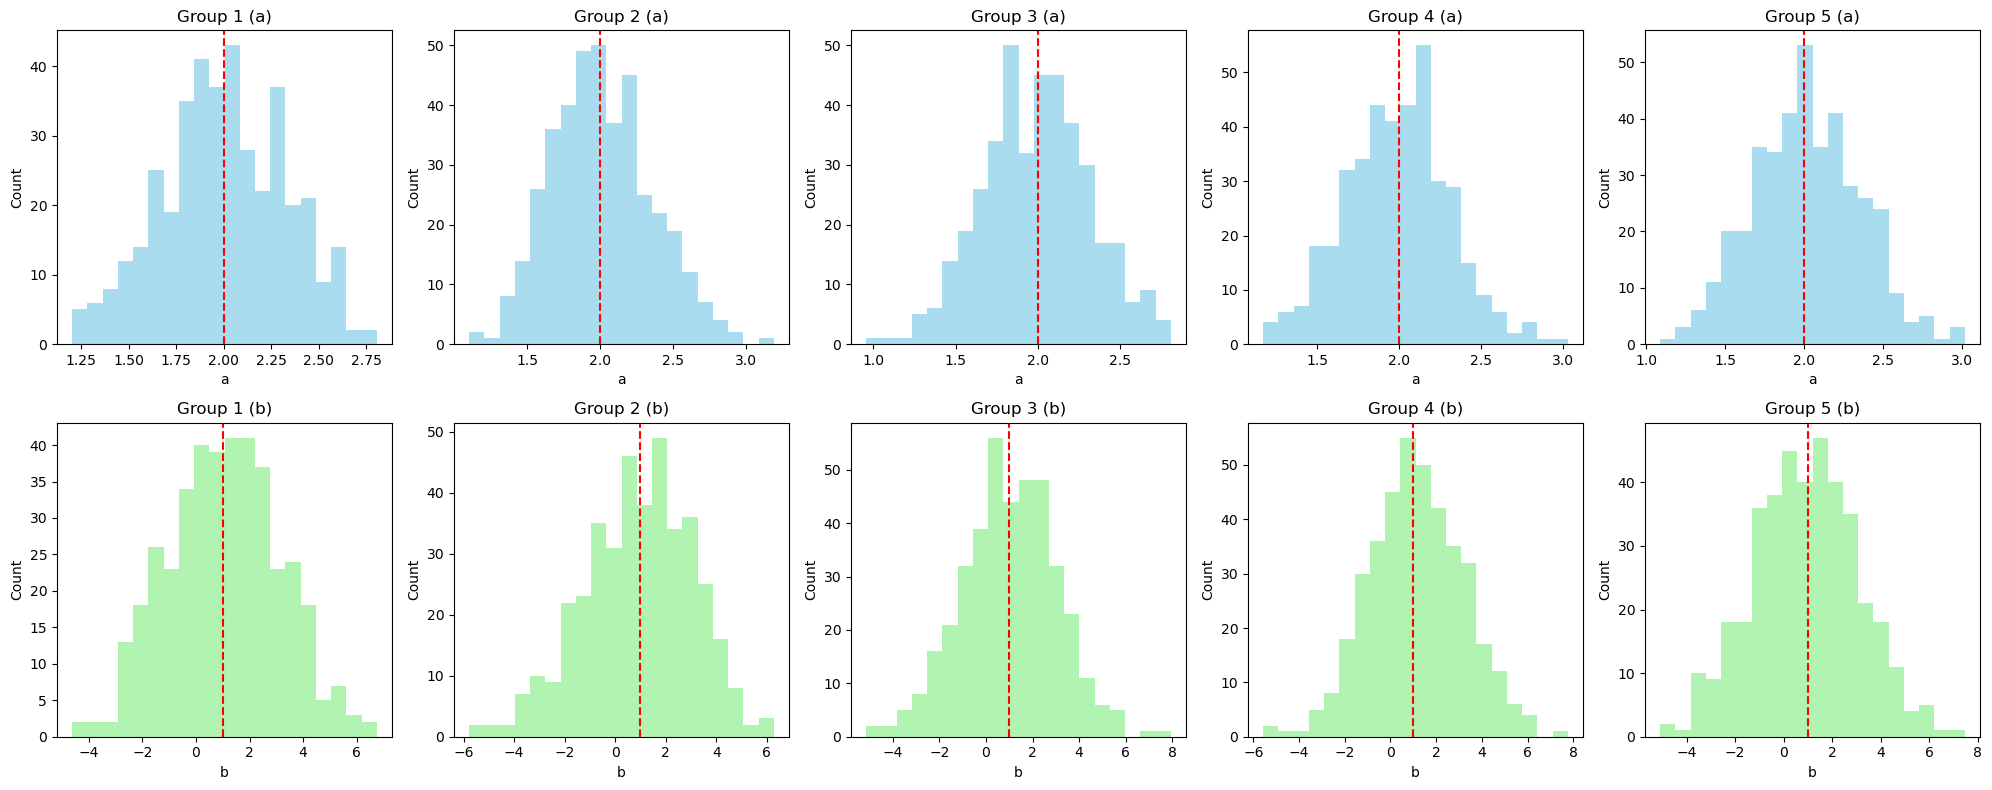

In [156]:
#畫出每一區的a和b直方圖
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

for i in range(5):
    axs[0, i].hist(a_groups[i], bins=20, alpha=0.7, color='skyblue')
    axs[0, i].axvline(true_a, color='r', linestyle='--', label='True a')
    axs[0, i].set_title(f'Group {i+1} (a)')
    axs[0, i].set_xlabel('a')
    axs[0, i].set_ylabel('Count')

    axs[1, i].hist(b_groups[i], bins=20, alpha=0.7, color='lightgreen')
    axs[1, i].axvline(true_b, color='r', linestyle='--', label='True b')
    axs[1, i].set_title(f'Group {i+1} (b)')
    axs[1, i].set_xlabel('b')
    axs[1, i].set_ylabel('Count')
    

plt.tight_layout()
plt.savefig("output2_1.pdf", transparent=True)
#plt.axvline(np.mean(a_groups[i]), color='orange', linestyle='--', label='Mean a')
plt.show()

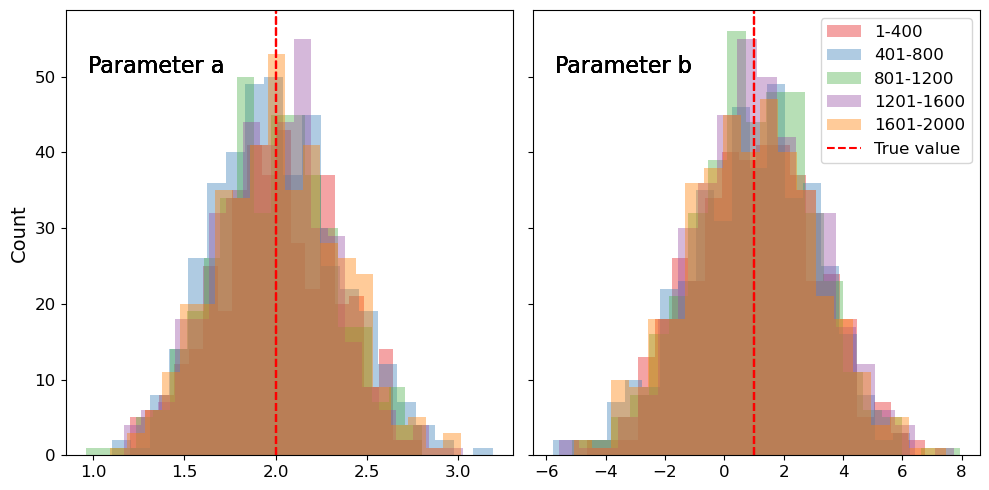

In [157]:
#畫出每一區的a和b直方圖
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1, hspace=0, wspace=0)

legends = ['1-400', '401-800', '801-1200', '1201-1600', '1601-2000']

colors = ['#e41a1c',  # Red
            '#377eb8',  # Blue
            '#4daf4a',  # Green
            '#984ea3',  # Purple
            '#ff7f00']  # Orange

for i in range(5):
    axs[0].hist(a_groups[i], bins=20, alpha=0.4, color=colors[i], label=legends[i])
    axs[0].text(0.05, 0.9, "Parameter a", transform=axs[0].transAxes, fontsize=16, verticalalignment='top', horizontalalignment='left')
    axs[0].axvline(true_a, color='r', linestyle='--', label='__no_legend__')
    # axs[0].set_title(f'Group {i+1} (a)')
    # axs[0].set_xlabel('a', fontsize=14)
    axs[0].set_ylabel('Count', fontsize=14)
    axs[0].tick_params(labelsize=12)


    axs[1].hist(b_groups[i], bins=20, alpha=0.4, color=colors[i], label=legends[i])
    axs[1].text(0.05, 0.9, "Parameter b", transform=axs[1].transAxes, fontsize=16, verticalalignment='top', horizontalalignment='left')
    axs[1].axvline(true_b, color='r', linestyle='--', label='True value' if i == 4 else '__no_legend__')
    axs[1].tick_params(labelsize=12)
    # axs[1].set_title(f'Group {i+1} (b)')
    # axs[1].set_xlabel('b', fontsize=14)
    # axs[1].set_ylabel('Count')
    

plt.tight_layout()
plt.legend(loc='upper right', fontsize=12)
plt.savefig("output2_1_combine.pdf", transparent=True)
plt.show()

practice 3

In [158]:
a_list = np.array(a_list)
b_list = np.array(b_list)

In [159]:
#對每個x值，計算y的平均與標準差
y_all = np.array(all_data)  #shape = (2000, 10)
y_mean = np.mean(y_all, axis=0)  #對2000組取平均
y_std = np.std(y_all, axis=0, ddof=1)  #標準差

#x軸（每組共用）
x = np.linspace(1, 10, 10)


In [160]:
#使用y_mean擬合線性模型
def linear_model(x, a, b):
    return a * x + b

In [161]:
params, cov_matrix = curve_fit(linear_model, x, y_mean, sigma=y_std, absolute_sigma=True)
a_fit, b_fit = params

In [162]:

print(f"線性擬合參數: a = {a_fit:.3f}, b = {b_fit:.3f}")
print("共變異數矩陣:")
print(cov_matrix)
#[0, 0] represents the variance of a (slope)
#[1, 1] represents the variance of b (intercept)
#[0, 1] or [1, 0] represents the covariance between a and b, indicating how changes in a relate to changes in b.
#This indicates that when slope a increases, intercept b tends to decrease — a typical compensation relationship between linear parameters.

線性擬合參數: a = 2.003, b = 1.002
共變異數矩陣:
[[ 0.10794169 -0.59670468]
 [-0.59670468  4.20152973]]


<Figure size 1200x400 with 0 Axes>

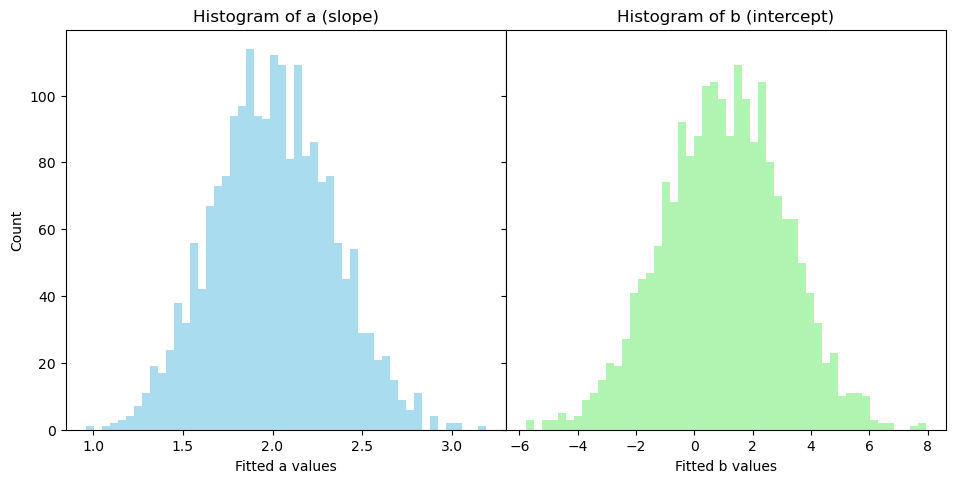

In [163]:
#繪製a與b的直方圖與2D直方圖
plt.figure(figsize=(12, 4))
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
plt.subplots_adjust(left=0.07, right=0.95, top=0.9, bottom=0.1, hspace=0, wspace=0)
# plt.subplot(1, 2, 1)
ax[0].hist(a_list, bins=50, alpha=0.7, color='skyblue')
ax[0].set_xlabel("Fitted a values")
ax[0].set_ylabel("Count")
ax[0].set_title("Histogram of a (slope)")
#plt.savefig("output.3_1.pdf", transparent=True)


ax[1].hist(b_list, bins=50, alpha=0.7, color='lightgreen')
ax[1].set_xlabel("Fitted b values")
# ax[1].set_ylabel("Count")
ax[1].set_title("Histogram of b (intercept)")
plt.savefig("output3_1.pdf", transparent=True)
plt.show()

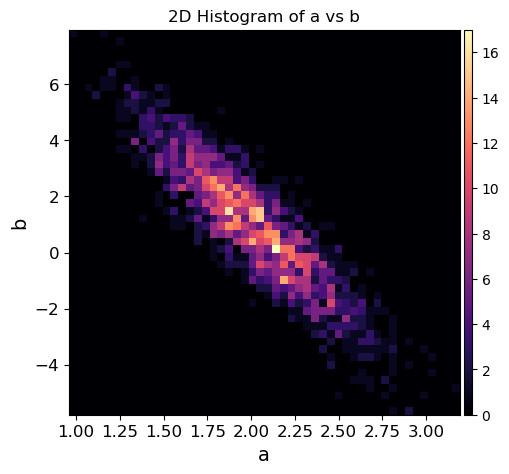

In [164]:
#2D直方圖
plt.figure(figsize=(6, 5))
hist2d = plt.hist2d(a_list, b_list, bins=50, cmap='magma')
plt.xlabel("a", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("b", fontsize=14)
plt.yticks(fontsize=12)
plt.title("2D Histogram of a vs b")
plt.colorbar(pad=0.01, aspect=50)
plt.savefig("output3_2.pdf", transparent=True)
plt.show()

<Figure size 600x600 with 0 Axes>

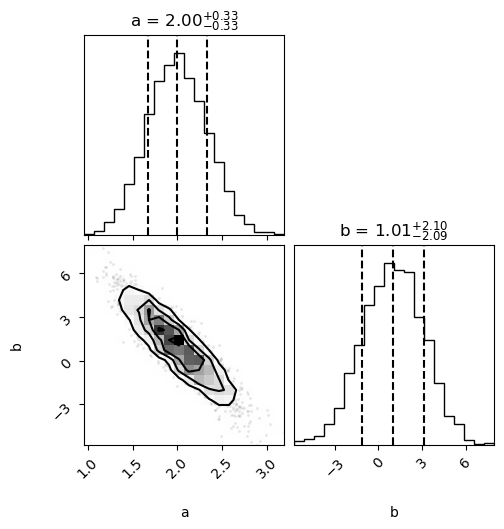

In [165]:
import corner

# Combine the two parameters into a single array for corner plot
data = np.vstack((a_list, b_list)).T

fig = plt.figure(figsize=(6, 6))
# Create the corner plot
figure = corner.corner(data, labels=["a", "b"], 
                    #    truths=[true_a, true_b], truth_color="k", 
                       show_titles=True, title_fmt=".2f", title_kwargs={"fontsize": 12}, 
                       quantiles=[0.16, 0.5, 0.84], plot_datapoints=True)

# Save the plot
figure.savefig("corner_plot.pdf", transparent=True)

In [166]:
#計算共變異數與相關係數
cov_ab = np.cov(a_list, b_list)
corr_ab = np.corrcoef(a_list, b_list)

print("Covariance matrix of [a, b]:")
print(cov_ab)
print("Correlation coefficient matrix of [a, b]:")
print(corr_ab)

#擬合a vs b的關係線，觀察是否線性
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(a_list, b_list)

print(f"Linear fit b = m * a + c:\nSlope = {slope:.3f}, Intercept = {intercept:.3f}")
print(f"Correlation coefficient (r) = {r_value:.3f}, R² = {r_value**2:.3f}")

Covariance matrix of [a, b]:
[[ 0.10879108 -0.61514693]
 [-0.61514693  4.35851386]]
Correlation coefficient matrix of [a, b]:
[[ 1.         -0.89333222]
 [-0.89333222  1.        ]]
Linear fit b = m * a + c:
Slope = -5.654, Intercept = 12.326
Correlation coefficient (r) = -0.893, R² = 0.798
